In [1]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
import graphviz
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
# EconML imports
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
data = pd.read_excel("data.xlsx")

In [2]:
data.columns

Index(['CDD65', 'DBT', 'IECC_CLIMATE', 'WSF', 'HHAGE', 'MONEYPY', 'NHSLDMEM',
       'COOLTYPE', 'AGECENAC', 'WWACAGE', 'NUMBERAC', 'TYPEHUQ', 'ATTIC',
       'ATTICFIN', 'PRKGPLC1', 'STUDIO', 'WALLTYPE', 'ROOFTYPE', 'WINDOWS',
       'YEARMADERANGE', 'TOTROOMS', 'TOTAREA', 'TOTCAREA', 'CELLAR', 'STORIES',
       'OA_LAT', 'ADQINSUL', 'ATTCCOOL', 'BASECOOL', 'TEMPHOMEAC',
       'TEMPGONEAC', 'TEMPNITEAC', 'USECENAC', 'USEWWAC', 'SOLAR', 'THERMAIN',
       'PROTHERM', 'AUDIT', 'AUDITCHG', 'ESWIN', 'SMARTTHERM', 'ELPAY',
       'SMARTMETER', 'INTDATA', 'ENERGYASST', 'SOLOTHER', 'KWHCOL', 'EUI',
       'TEMPNITEAC-TEMPHOMEAC', 'TEMPNITEAC-TEMPGONEAC', 'Home_vs_Night',
       'Gone_vs_Night', 'CDD_category', 'Income_category', 'NHSLDMEM_category',
       'AGECENAC_category', 'WWACAGE_category'],
      dtype='object')

In [3]:
data_for_causal = data[['CDD_category','IECC_CLIMATE','WSF','NHSLDMEM_category','Income_category','COOLTYPE','AGECENAC_category','THERMAIN','Home_vs_Night','Gone_vs_Night','USECENAC','TYPEHUQ','ROOFTYPE',
                        'WALLTYPE','WINDOWS','YEARMADERANGE','TOTROOMS','TOTAREA','TOTCAREA','OA_LAT','ADQINSUL','AUDIT','ESWIN','ELPAY','SMARTMETER','INTDATA','ENERGYASST','SOLOTHER','EUI']]

In [4]:
energy_assist = data_for_causal.copy()
energy_assist["SOLOTHER"] = energy_assist['SOLOTHER'].replace([0,1], ["No", "Yes"])
# data_access = data_access.loc[(data_access['ENERGYASST'] >= 0)]
energy_assist.groupby(['ENERGYASST'])['EUI'].count()

ENERGYASST
0    4457
1     244
Name: EUI, dtype: int64

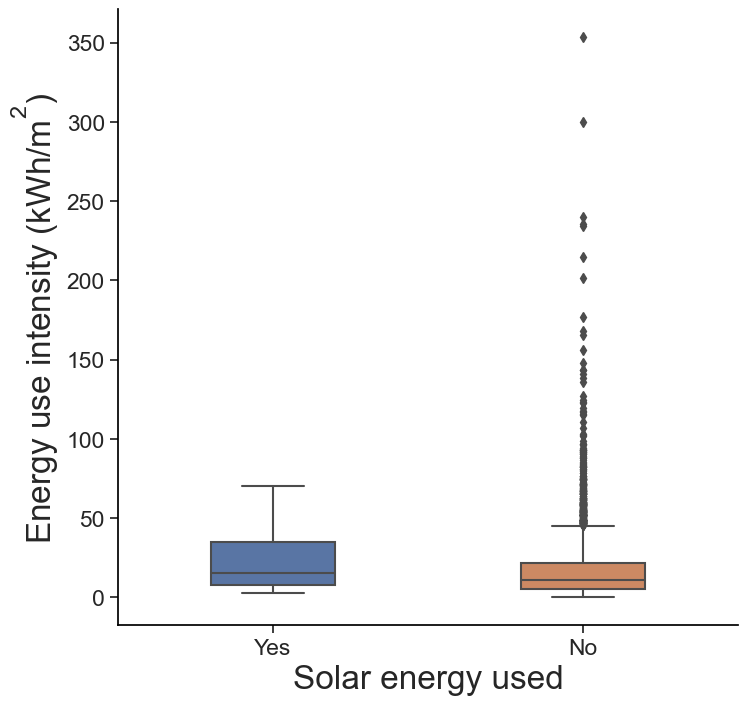

In [5]:
# PROPS = {
#     'boxprops':{'facecolor':'none', 'edgecolor':'black'},
#     'medianprops':{'color':'black'},
#     'whiskerprops':{'color':'black'},
#     'capprops':{'color':'black'}
# }

plt.figure(figsize=(8,8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.5)
plt.rcParams["axes.edgecolor"] = "black"
# draw = sns.violinplot(x = temp['IECC_CLIMATE'], y = temp['KWHCOL'], hue=temp['TEMP_CHANGE'])
draw = sns.boxplot(x = energy_assist['SOLOTHER'], y = energy_assist['EUI'], width=0.4, order=["Yes", "No"])
draw.set_xlabel("Solar energy used",fontsize=24)
draw.set_ylabel("Energy use intensity (kWh/$\mathregular{m^2}$)",fontsize=24)
# draw.set(ylim=(0, 25000))
figure = draw.get_figure()
figure.savefig('Solar_used.png', bbox_inches='tight', dpi=300)